# ①Isomap

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,manifold

# 加载用于降维的数据

In [3]:
def load_data():
    '''
    加载用于降维的数据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target

# 测试 Isomap 的用法

In [4]:
def test_Isomap(*data):
    '''
    测试 Isomap 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    for n in [4,3,2,1]: # 依次考察降维目标为 4维、3维、2维、1维
        isomap=manifold.Isomap(n_components=n)
        isomap.fit(X)
        print('reconstruction_error(n_components=%d) : %s'%
            (n, isomap.reconstruction_error()))

# 测试 Isomap 中 n_neighbors 参数的影响，其中降维至 2维

In [17]:
def plot_Isomap_k(*data):
    '''
    测试 Isomap 中 n_neighbors 参数的影响，其中降维至 2维

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    Ks=[1,5,25,y.size-1] # n_neighbors参数的候选值的集合

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=100)
    #
    for i, k in enumerate(Ks):
        isomap=manifold.Isomap(n_components=2,n_neighbors=k)
        X_r=isomap.fit_transform(X)#原始数据集转换到二维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 Isomap 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"
            %label,color=color)

        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("Isomap")
    plt.show()

# 测试 Isomap 中 n_neighbors 参数的影响，其中降维至 1维

In [18]:
def plot_Isomap_k_d1(*data):
    '''
    测试 Isomap 中 n_neighbors 参数的影响，其中降维至 1维

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=100)
    #
    for i, k in enumerate(Ks):
        isomap=manifold.Isomap(n_components=1,n_neighbors=k)
        X_r=isomap.fit_transform(X)#原始数据集转换到 1 维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 Isomap 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position],np.zeros_like(X_r[position]),
            label="target= %d"%label,color=color)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("Isomap")
    plt.show()

# 产生用于降维的数据集

In [19]:
if __name__=='__main__':
    X,y=load_data() 

# 调用 test_Isomap

In [20]:
test_Isomap(X,y)   

reconstruction_error(n_components=4) : 1.00971800681
reconstruction_error(n_components=3) : 1.01828451463
reconstruction_error(n_components=2) : 1.02769837643
reconstruction_error(n_components=1) : 1.07166427632


# 调用 plot_Isomap_k

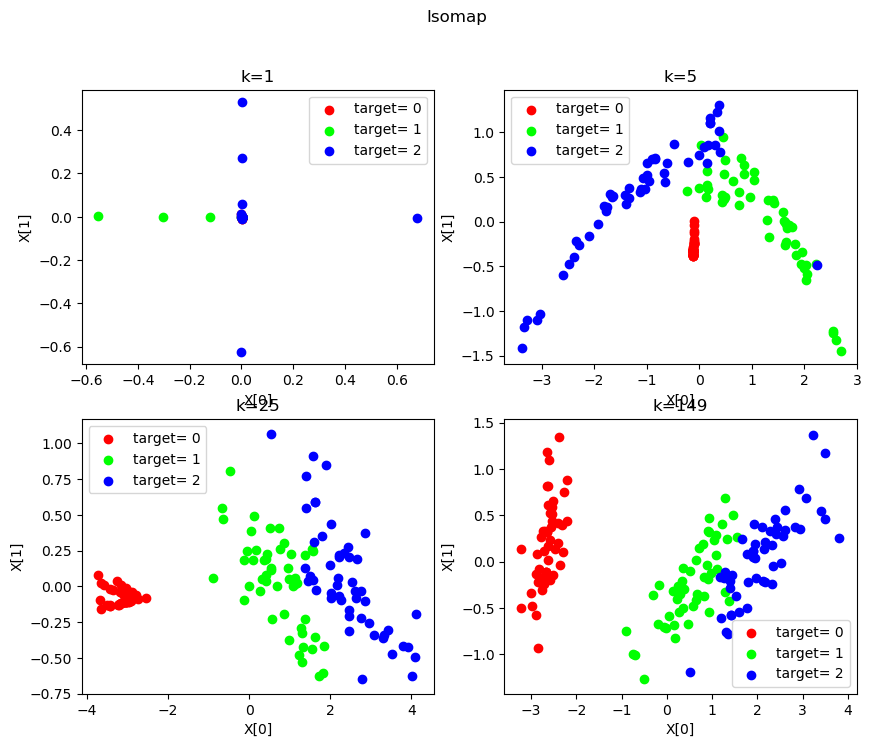

In [21]:
plot_Isomap_k(X,y)   

# 调用 plot_Isomap_k_d1

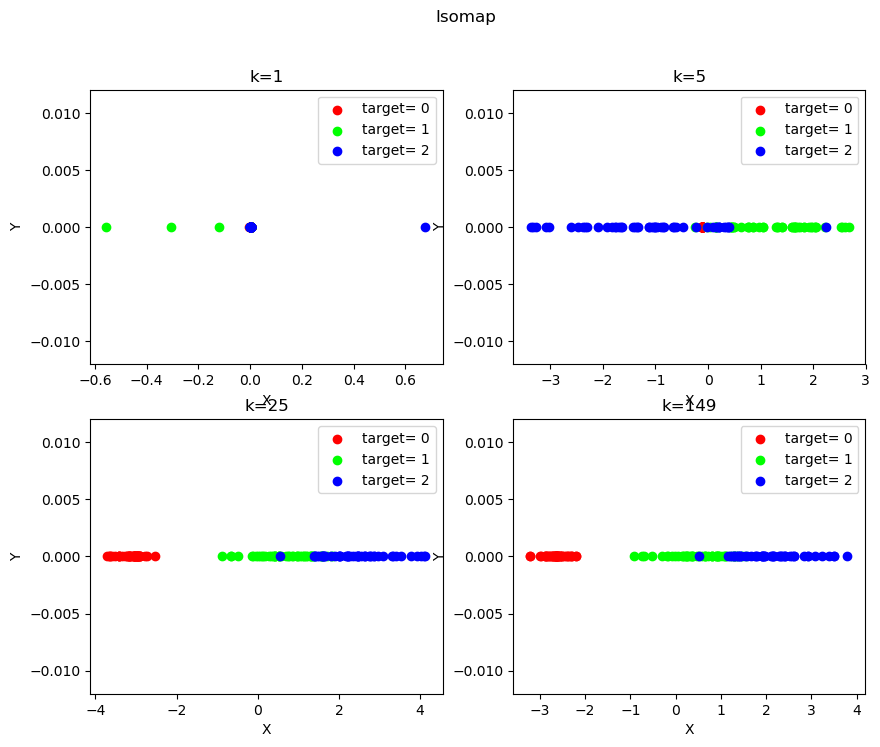

In [22]:
plot_Isomap_k_d1(X,y)   

# ②KNN分类和回归模型

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets,cross_validation

# 加载分类模型使用的数据集

In [25]:
def load_classification_data():
    '''
    加载分类模型使用的数据集。

    :return: 一个元组，依次为：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    '''
    digits=datasets.load_digits() # 使用 scikit-learn 自带的手写识别数据集 Digit Dataset
    X_train=digits.data
    y_train=digits.target
    return cross_validation.train_test_split(X_train, y_train,test_size=0.25,
            random_state=0,stratify=y_train) # 进行分层采样拆分，测试集大小占 1/4

# 测试 KNeighborsClassifier 的用法

In [26]:
def test_KNeighborsClassifier(*data):
    '''
    测试 KNeighborsClassifier 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为
    ：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train,y_train)
    print("Training Score:%f"%clf.score(X_train,y_train))
    print("Testing Score:%f"%clf.score(X_test,y_test))

# 测试 KNeighborsClassifier 中 n_neighbors 和 weights 参数的影响

In [32]:
def test_KNeighborsClassifier_k_w(*data):
    '''
    测试 KNeighborsClassifier 中 n_neighbors 和 weights 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为
    ：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(weights=weight,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

# 测试 KNeighborsClassifier 中 n_neighbors 和 p 参数的影响

In [33]:

def test_KNeighborsClassifier_k_p(*data):
    '''
    测试 KNeighborsClassifier 中 n_neighbors 和 p 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为
    ：训练样本集、测试样本集、训练样本的标记、测试样本的标记
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(p=P,n_neighbors=K)
            clf.fit(X_train,y_train)
            testing_scores.append(clf.score(X_test,y_test))
            training_scores.append(clf.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()

# 获取分类模型的数据集

In [29]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_classification_data()    

# 调用 test_KNeighborsClassifier

In [30]:
test_KNeighborsClassifier(X_train,X_test,y_train,y_test)

Training Score:0.991091
Testing Score:0.980000


# 调用 test_KNeighborsClassifier_k_w

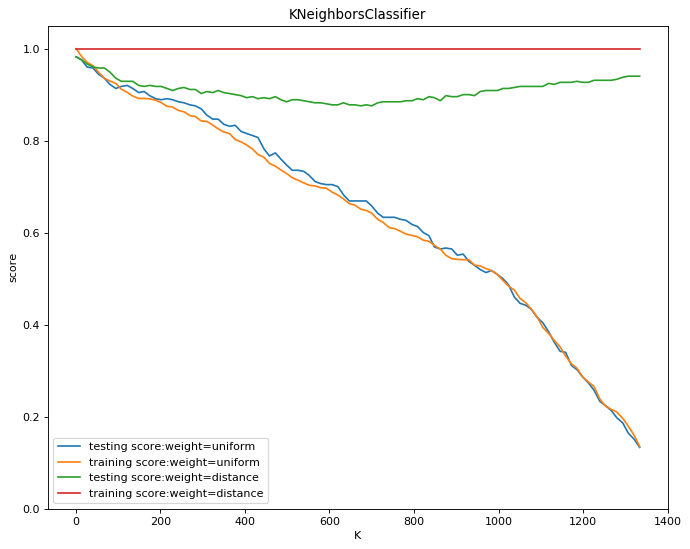

In [34]:
test_KNeighborsClassifier_k_w(X_train,X_test,y_train,y_test)

# 调用 test_KNeighborsClassifier_k_p

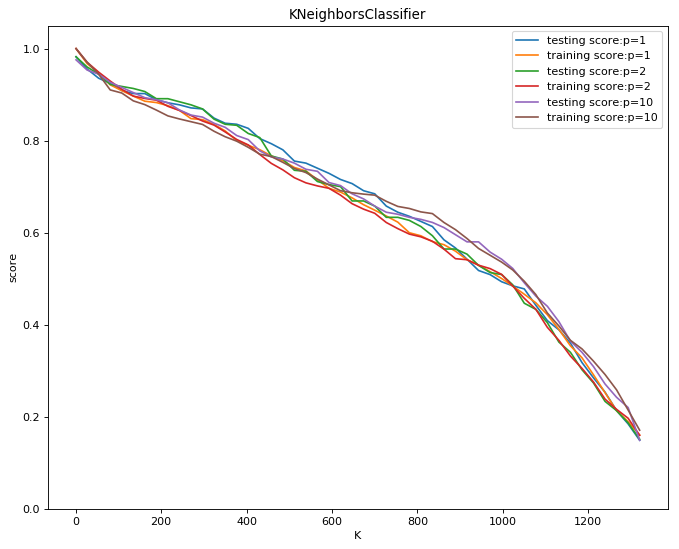

In [35]:
test_KNeighborsClassifier_k_p(X_train,X_test,y_train,y_test)

# ③KNeighborsRegressor

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, cross_validation

In [37]:
# 创建回归模型使用的数据集

In [38]:
def create_regression_data(n):
    '''
    创建回归模型使用的数据集

    :param n: 数据集大小
    :return: 一个元组，依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    '''
    X =5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(int(n/5))) # 每隔 5 个样本就在样本的值上添加噪音
    return cross_validation.train_test_split(X, y,test_size=0.25,random_state=0)# 进行简单拆分，测试集大小占 1/4

In [39]:
# 测试 KNeighborsRegressor 的用法

In [40]:
def test_KNeighborsRegressor(*data):
    '''
    测试 KNeighborsRegressor 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=neighbors.KNeighborsRegressor()
    regr.fit(X_train,y_train)
    print("Training Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))

# 测试 KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响

In [42]:
def test_KNeighborsRegressor_k_w(*data):
    '''
    测试 KNeighborsRegressor 中 n_neighbors 和 weights 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 weights 下， 预测得分随 n_neighbors 的曲线
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:weight=%s"%weight)
        ax.plot(Ks,training_scores,label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()


# 测试 KNeighborsRegressor 中 n_neighbors 和 p 参数的影响

In [48]:
def test_KNeighborsRegressor_k_p(*data):
    '''
    测试 KNeighborsRegressor 中 n_neighbors 和 p 参数的影响

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、测试样本集、训练样本的值、测试样本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    Ks=np.linspace(1,y_train.size,endpoint=False,dtype='int')
    Ps=[1,2,10]

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    ### 绘制不同 p 下， 预测得分随 n_neighbors 的曲线
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(p=P,n_neighbors=K)
            regr.fit(X_train,y_train)
            testing_scores.append(regr.score(X_test,y_test))
            training_scores.append(regr.score(X_train,y_train))
        ax.plot(Ks,testing_scores,label="testing score:p=%d"%P)
        ax.plot(Ks,training_scores,label="training score:p=%d"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

# 获取回归模型的数据集

In [44]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=create_regression_data(1000)
    

# 调用 test_KNeighborsRegressor

In [45]:
test_KNeighborsRegressor(X_train,X_test,y_train,y_test) 

Training Score:0.978433
Testing Score:0.961663


# 调用 test_KNeighborsRegressor_k_w

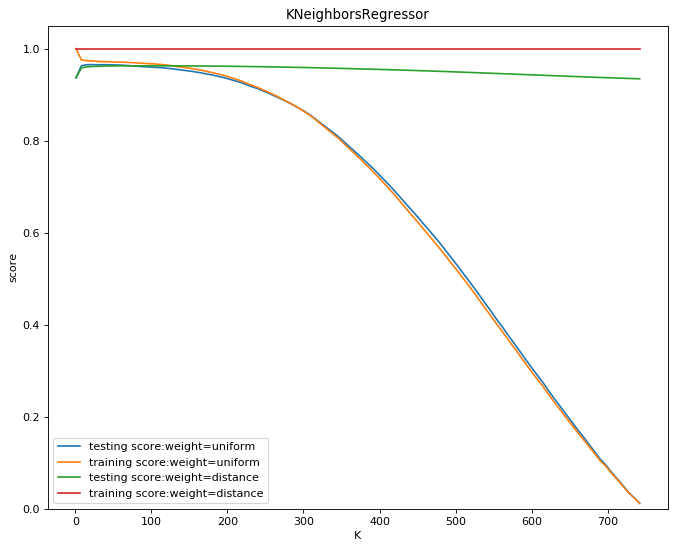

In [46]:
test_KNeighborsRegressor_k_w(X_train,X_test,y_train,y_test)

#  调用 test_KNeighborsRegressor_k_p

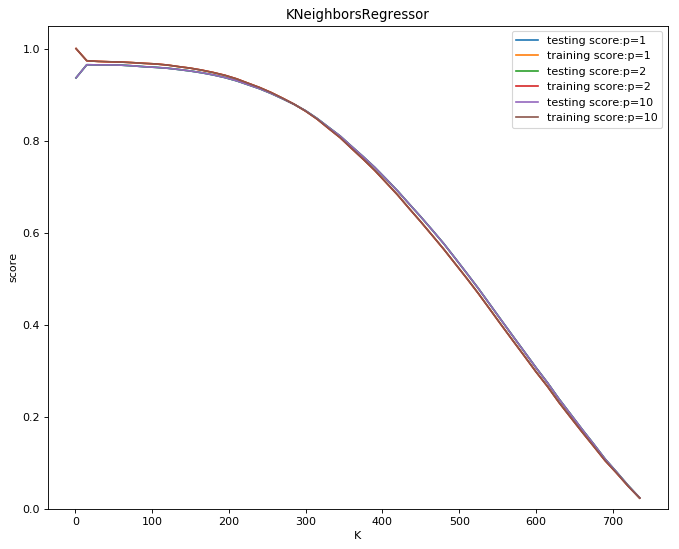

In [49]:
test_KNeighborsRegressor_k_p(X_train,X_test,y_train,y_test)

# ④KernelPCA

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,decomposition

# 加载用于降维的数据

In [51]:
def load_data():
    '''
    加载用于降维的数#据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target


# 测试 KernelPCA 的用法

In [52]:
def test_KPCA(*data):
    '''
    测试 KernelPCA 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    kernels=['linear','poly','rbf','sigmoid']
    for kernel in kernels:
        kpca=decomposition.KernelPCA(n_components=None,kernel=kernel) # 依次测试四种核函数
        kpca.fit(X)
        print('kernel=%s --> lambdas: %s'% (kernel,kpca.lambdas_))

# 绘制经过 KernelPCA 降维到二维之后的样本点

In [53]:
def plot_KPCA(*data):
    '''
    绘制经过 KernelPCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    kernels=['linear','poly','rbf','sigmoid']
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色

    for i,kernel in enumerate(kernels):
        kpca=decomposition.KernelPCA(n_components=2,kernel=kernel)
        kpca.fit(X)
        X_r=kpca.transform(X)# 原始数据集转换到二维
        ax=fig.add_subplot(2,2,i+1) ## 两行两列，每个单元显示一种核函数的 KernelPCA 的效果图
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,
            color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("kernel=%s"%kernel)
    plt.suptitle("KPCA")
    plt.show()

# 绘制经过 使用 poly 核的KernelPCA 降维到二维之后的样本点

In [54]:
def plot_KPCA_poly(*data):
    '''
    绘制经过 使用 poly 核的KernelPCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    Params=[(3,1,1),(3,10,1),(3,1,10),(3,10,10),(10,1,1),(10,10,1),(10,1,10),(10,10,10)] # poly 核的参数组成的列表。
            # 每个元素是个元组，代表一组参数（依次为：p 值， gamma 值， r 值）
            # p 取值为：3，10
            # gamma 取值为 ：1，10
            # r 取值为：1，10
            # 排列组合一共 8 种组合
    for i,(p,gamma,r) in enumerate(Params):
        kpca=decomposition.KernelPCA(n_components=2,kernel='poly'
        ,gamma=gamma,degree=p,coef0=r)  # poly 核，目标为2维
        kpca.fit(X)
        X_r=kpca.transform(X)# 原始数据集转换到二维
        ax=fig.add_subplot(2,4,i+1)## 两行四列，每个单元显示核函数为 poly 的 KernelPCA 一组参数的效果图
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,
            color=color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([]) # 隐藏 x 轴刻度
        ax.set_yticks([]) # 隐藏 y 轴刻度
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$ (%s (x \cdot z+1)+%s)^{%s}$"%(gamma,r,p))
    plt.suptitle("KPCA-Poly")
    plt.show()

# 绘制经过 使用 rbf 核的KernelPCA 降维到二维之后的样本点

In [55]:
def plot_KPCA_rbf(*data):
    '''
    绘制经过 使用 rbf 核的KernelPCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    Gammas=[0.5,1,4,10]# rbf 核的参数组成的列表。每个参数就是 gamma值
    for i,gamma in enumerate(Gammas):
        kpca=decomposition.KernelPCA(n_components=2,kernel='rbf',gamma=gamma)
        kpca.fit(X)
        X_r=kpca.transform(X)# 原始数据集转换到二维
        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,
            color=color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([]) # 隐藏 x 轴刻度
        ax.set_yticks([]) # 隐藏 y 轴刻度
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$\exp(-%s||x-z||^2)$"%gamma)
    plt.suptitle("KPCA-rbf")
    plt.show()

# 绘制经过 使用 sigmoid 核的KernelPCA 降维到二维之后的样本点

In [56]:
def plot_KPCA_sigmoid(*data):
    '''
    绘制经过 使用 sigmoid 核的KernelPCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    Params=[(0.01,0.1),(0.01,0.2),(0.1,0.1),(0.1,0.2),(0.2,0.1),(0.2,0.2)]# sigmoid 核的参数组成的列表。
        # 每个元素就是一种参数组合（依次为 gamma,coef0）
        # gamma 取值为： 0.01，0.1，0.2
        # coef0 取值为： 0.1,0.2
        # 排列组合一共有 6 种组合
    for i,(gamma,r) in enumerate(Params):
        kpca=decomposition.KernelPCA(n_components=2,kernel='sigmoid',gamma=gamma,coef0=r)
        kpca.fit(X)
        X_r=kpca.transform(X)# 原始数据集转换到二维
        ax=fig.add_subplot(3,2,i+1)## 三行两列，每个单元显示核函数为 sigmoid 的 KernelPCA 一组参数的效果图
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,
            color=color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([]) # 隐藏 x 轴刻度
        ax.set_yticks([]) # 隐藏 y 轴刻度
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$\tanh(%s(x\cdot z)+%s)$"%(gamma,r))
    plt.suptitle("KPCA-sigmoid")
    plt.show()

# 产生用于降维的数据集

In [57]:
if __name__=='__main__':
    X,y=load_data() 

# 调用 test_KPCA

In [58]:
test_KPCA(X,y)   

kernel=linear --> lambdas: [  6.29501274e+02   3.60942922e+01   1.17000623e+01   3.52877104e+00
   1.23198570e-12   5.59339911e-13   3.00132223e-13   1.44792887e-13
   7.26124882e-14   2.58610490e-14   2.39651480e-14   2.33443867e-14
   2.21547175e-14   2.09821361e-14   2.00105059e-14   1.80754144e-14
   1.78011811e-14   1.76859151e-14   1.73375077e-14   1.49430474e-14
   1.45358449e-14   1.42622935e-14   1.37584034e-14   1.30964630e-14
   1.29650396e-14   1.27474074e-14   1.26552080e-14   1.17809111e-14
   1.17672743e-14   1.17465648e-14   1.15419166e-14   1.13896811e-14
   1.10951740e-14   1.07627125e-14   1.06267525e-14   1.04881626e-14
   9.86725055e-15   9.66957104e-15   9.14609222e-15   8.92201500e-15
   8.57542480e-15   8.34659439e-15   8.07959170e-15   7.59880728e-15
   7.58358638e-15   6.20093737e-15   5.83758474e-15   5.57408143e-15
   5.39974395e-15   5.33962944e-15   5.05802593e-15   5.05731103e-15
   5.05341071e-15   4.50209206e-15   4.46126047e-15   4.43373170e-15
   4.31

# 调用 plot_KPCA

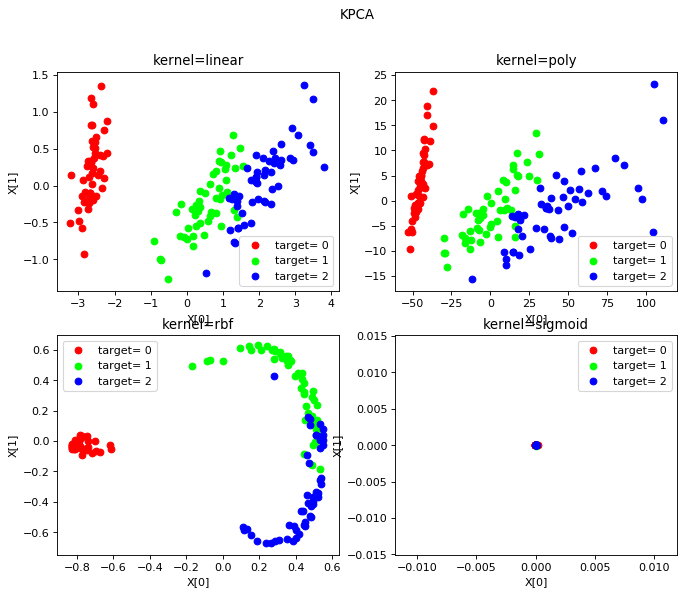

In [59]:
plot_KPCA(X,y)   

# 调用 plot_KPCA_poly

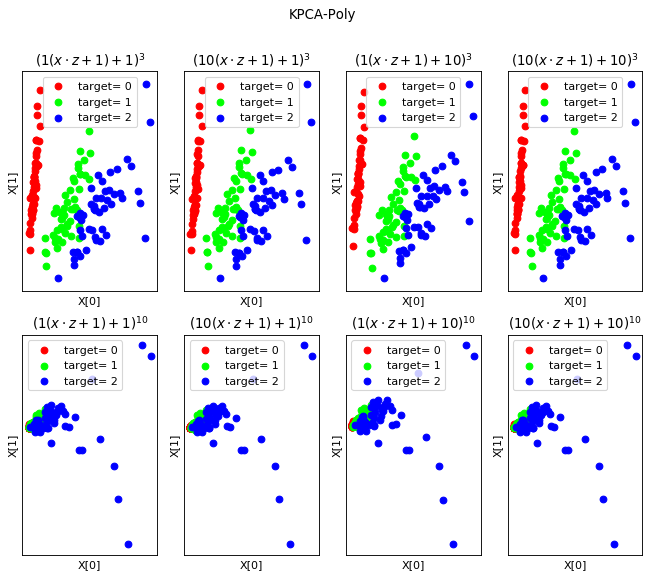

In [60]:
plot_KPCA_poly(X,y)   

# 调用 plot_KPCA_rbf

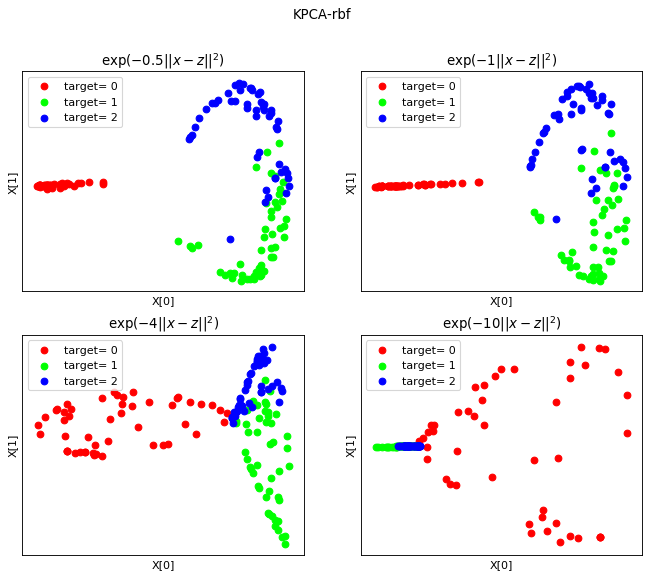

In [61]:
plot_KPCA_rbf(X,y)      

# 调用 plot_KPCA_sigmoid

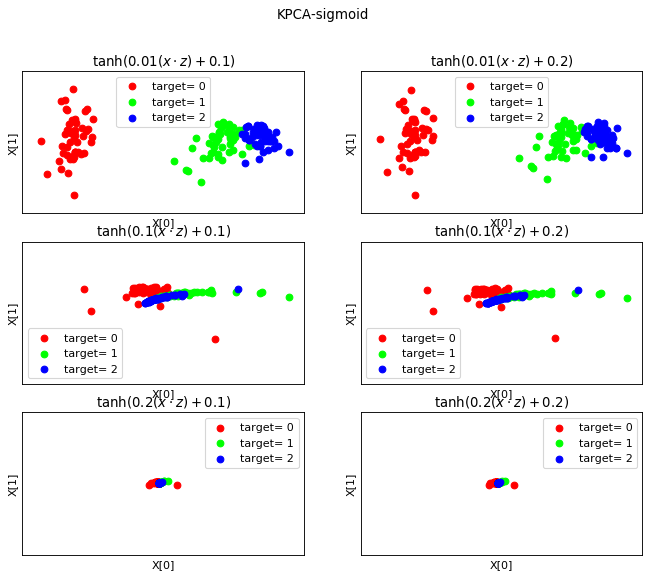

In [62]:
plot_KPCA_sigmoid(X,y)   

# ⑤LocallyLinearEmbedding

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,manifold

#  加载用于降维的数据

In [65]:
def load_data():
    '''
    加载用于降维的数据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target

# 测试 LocallyLinearEmbedding 的用法

In [66]:
def test_LocallyLinearEmbedding(*data):
    '''
    测试 LocallyLinearEmbedding 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    for n in [4,3,2,1]:# 依次考察降维目标为 4维、3维、2维、1维
        lle=manifold.LocallyLinearEmbedding(n_components=n)
        lle.fit(X)
        print('reconstruction_error(n_components=%d) : %s'%
            (n, lle.reconstruction_error_))

# 测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 2维

In [67]:
def plot_LocallyLinearEmbedding_k(*data):
    '''
    测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 2维

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    for i, k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=k)
        X_r=lle.fit_transform(X)#原始数据集转换到二维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 LocallyLinearEmbedding 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"
            %label,color=color)

        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()

# 测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 1维

In [68]:
def plot_LocallyLinearEmbedding_k_d1(*data):
    '''
    测试 LocallyLinearEmbedding 中 n_neighbors 参数的影响，其中降维至 1维

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    Ks=[1,5,25,y.size-1]# n_neighbors参数的候选值的集合

    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    for i, k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=1,n_neighbors=k)
        X_r=lle.fit_transform(X)#原始数据集转换到 1 维

        ax=fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示不同 n_neighbors 参数的 LocallyLinearEmbedding 的效果图
        colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
            (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
        for label ,color in zip( np.unique(y),colors):
            position=y==label
            ax.scatter(X_r[position],np.zeros_like(X_r[position]),
            label="target= %d"%label,color=color)

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()   

# 产生用于降维的数据集

In [69]:
#%%
if __name__=='__main__':
    X,y=load_data() 

# 调用 test_LocallyLinearEmbedding

In [70]:
test_LocallyLinearEmbedding(X,y)   

reconstruction_error(n_components=4) : 7.19936874015e-07
reconstruction_error(n_components=3) : 3.87060500591e-07
reconstruction_error(n_components=2) : 6.64141988521e-08
reconstruction_error(n_components=1) : -1.32627936442e-15


# 调用 plot_LocallyLinearEmbedding_k

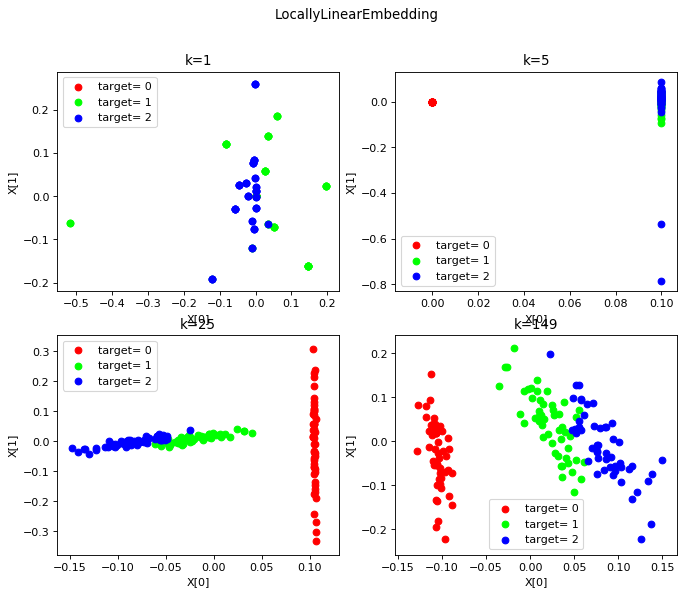

In [71]:
plot_LocallyLinearEmbedding_k(X,y)   

# 调用 plot_LocallyLinearEmbedding_k_d1

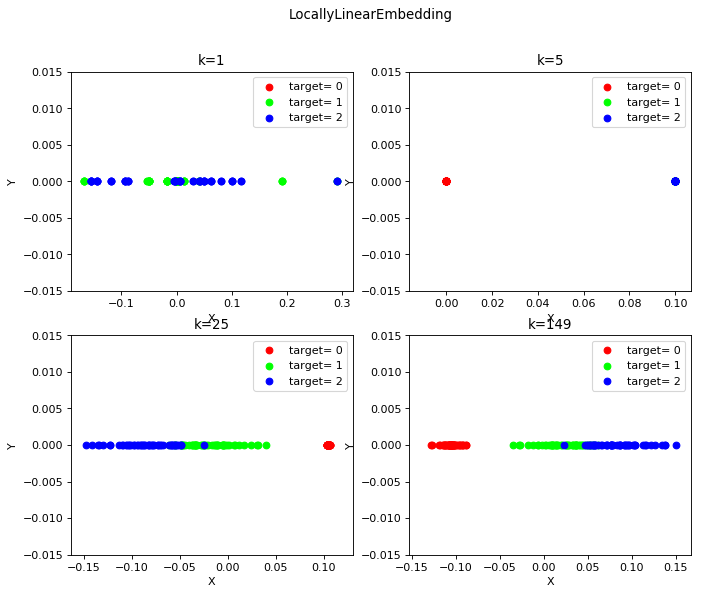

In [72]:
plot_LocallyLinearEmbedding_k_d1(X,y)   

# ⑥MDS

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,manifold

# 加载用于降维的数据

In [74]:
def load_data():
    '''
    加载用于降维的数据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target



# 测试 MDS 的用法

In [75]:
def test_MDS(*data):
    '''
    测试 MDS 的用法

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    for n in [4,3,2,1]: # 依次考察降维目标为 4维、3维、2维、1维
        mds=manifold.MDS(n_components=n)
        mds.fit(X)
        print('stress(n_components=%d) : %s'% (n, str(mds.stress_)))


# 绘制经过 使用 MDS 降维到二维之后的样本点

In [82]:
def plot_MDS(*data):
    '''
    绘制经过 使用 MDS 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    mds=manifold.MDS(n_components=2)
    X_r=mds.fit_transform(X) #原始数据集转换到二维

    ### 绘制二维图形
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)# 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()

# 产生用于降维的数据集

In [83]:
if __name__=='__main__':
    X,y=load_data() 

# 调用 test_MDS

In [84]:
test_MDS(X,y)   
    

stress(n_components=4) : 12.0373545279
stress(n_components=3) : 14.9158761297
stress(n_components=2) : 235.443035941
stress(n_components=1) : 22264.8745968


# 调用 plot_MDS

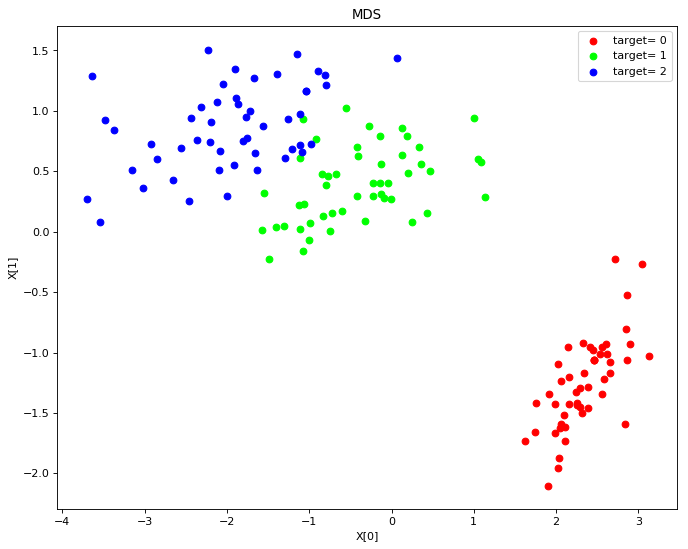

In [85]:
plot_MDS(X,y)   

# ⑦PCA

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import   datasets,decomposition

In [87]:
# 加载用于降维的数据

In [88]:
def load_data():
    '''
    加载用于降维的数据

    :return: 一个元组，依次为训练样本集和样本集的标记
    '''
    iris=datasets.load_iris()# 使用 scikit-learn 自带的 iris 数据集
    return  iris.data,iris.target

# 测试 PCA 的用法

In [89]:
def test_PCA(*data):
    '''
    测试 PCA 的用法

    :param data:  可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    pca=decomposition.PCA(n_components=None) # 使用默认的 n_components
    pca.fit(X)
    print('explained variance ratio : %s'% str(pca.explained_variance_ratio_))

# 绘制经过 PCA 降维到二维之后的样本点

In [92]:
def plot_PCA(*data):
    '''
    绘制经过 PCA 降维到二维之后的样本点

    :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
    :return: None
    '''
    X,y=data
    pca=decomposition.PCA(n_components=2) # 目标维度为2维
    pca.fit(X)
    X_r=pca.transform(X) # 原始数据集转换到二维
    ###### 绘制二维数据 ########
    fig=plt.figure()
    #
    fig=plt.figure(figsize=(10,8),dpi=80)
    #
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
        (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),) # 颜色集合，不同标记的样本染不同的颜色
    for label ,color in zip( np.unique(y),colors):
        position=y==label
        ax.scatter(X_r[position,0],X_r[position,1],label="target= %d"%label,color=color)

    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

# 产生用于降维的数据集

In [93]:
if __name__=='__main__':
    X,y=load_data() 

# 调用 test_PCA

In [94]:
test_PCA(X,y)    

explained variance ratio : [ 0.92461621  0.05301557  0.01718514  0.00518309]


# 调用 plot_PCA

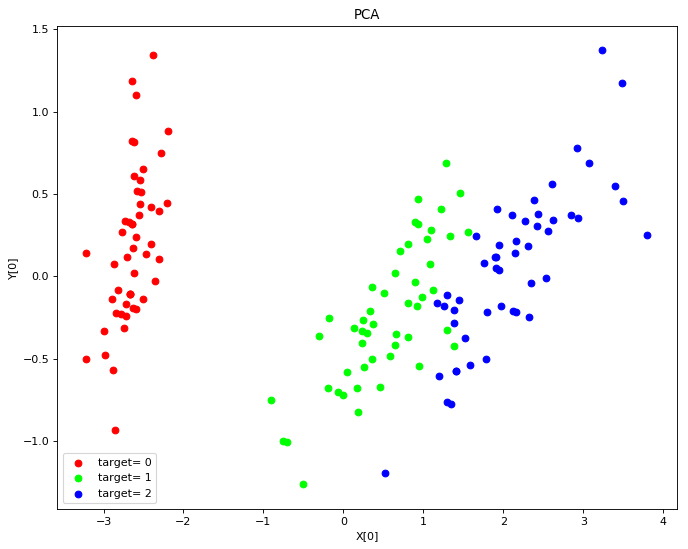

In [95]:
plot_PCA(X,y)